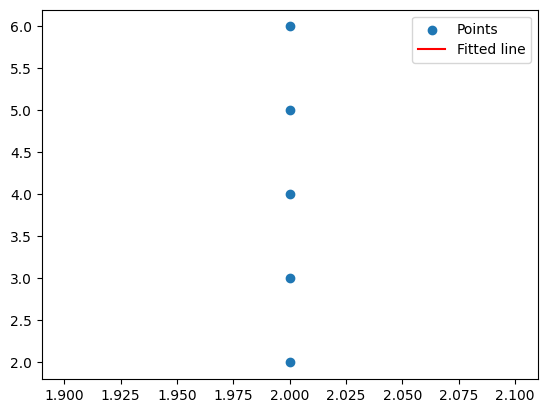

m: 1.5999999999999999
c: 0.7999999999999999


In [45]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# points
x = np.array([2, 2, 2, 2, 2])
y = np.array([2, 3, 4, 5, 6])

# Fit line
A = np.vstack([x, np.ones_like(x)]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]

# plotting points and line
plt.scatter(x, y, label='Points')
plt.plot(x, m*x + c, 'r', label='Fitted line')
plt.legend()
plt.show()

print("m:", m)
print("c:", c)


**2. Hough Transform in Python:**

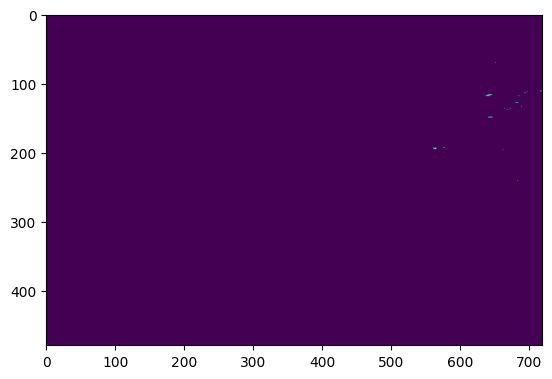

In [46]:
image = cv2.imread('/content/jaguar_facts_l.jpg', cv2.IMREAD_GRAYSCALE)

#edge detection using Canny
edges = cv2.Canny(image, 50, 150)

#Hough line Transform
lines = cv2.HoughLines(edges, 1, np.pi/180, threshold=100)

#ploting lines on the image
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

#displayng
plt.imshow(image)
plt.show()


**3. Hough Transform using Built-in Functions:**

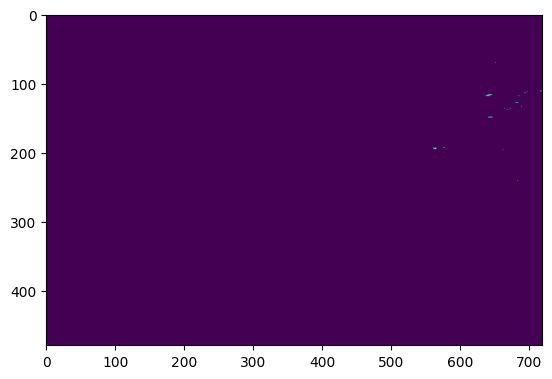

In [47]:
image = cv2.imread('/content/jaguar_facts_l.jpg', cv2.IMREAD_GRAYSCALE)
# Apply edge detection (e.g., using Canny)
edges = cv2.Canny(image, 50, 150)

# Hough Line Transform using built-in function
lines = cv2.HoughLines(edges, 1, np.pi/180, threshold=100)

# Plot the lines on the image
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Display the image with lines
plt.imshow(image)
plt.show()


**Create an accumulator matrix for the edges in an image.**

In [48]:
#accumulator matrix for edges
accumulator = np.zeros_like(edges)

for y, x in zip(*np.where(edges > 0)):
    for theta in np.deg2rad(range(0, 180)):
        rho = int(x * np.cos(theta) + y * np.sin(theta))
        accumulator[rho, int(np.rad2deg(theta))] += 1


IndexError: ignored

**Find the max value in the accumulator matrix**

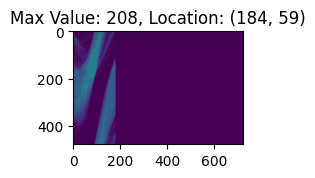

In [51]:
#max value in accumulator matrix
max_value = np.max(accumulator)
max_index = np.unravel_index(np.argmax(accumulator), accumulator.shape)

#plotting accumulator matrix
plt.subplot(2, 3, 6)
plt.imshow(accumulator, cmap='viridis')
plt.title(f'Max Value: {max_value}, Location: {max_index}')

#displaying plots
plt.tight_layout()
plt.show()

**4. SIFT (Scale-Invariant Feature Transform):**

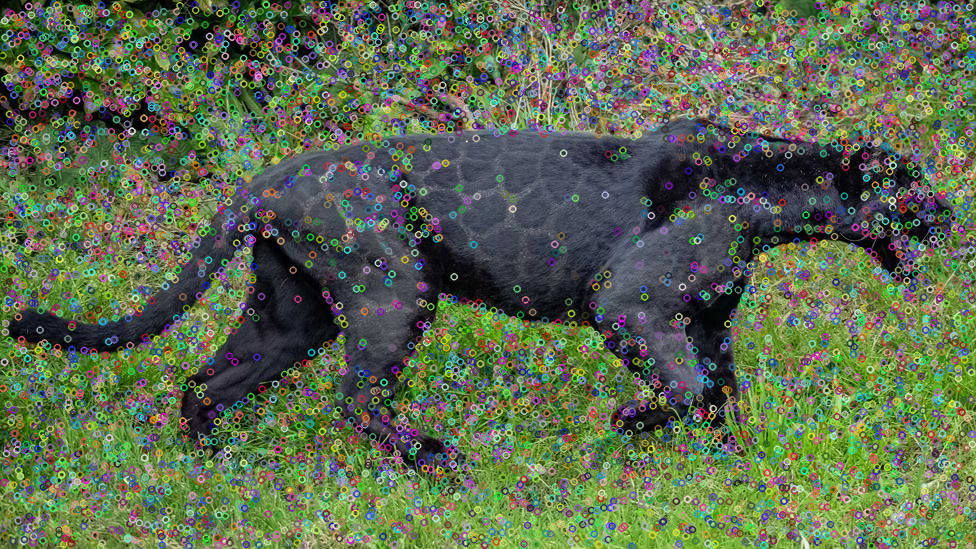

In [52]:
image = cv2.imread('/content/_130646221_rarejaguarinkaarrivesatchesterzoo-23.jpg')
#to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#initializing the SIFT detector
sift = cv2.SIFT_create()

#detect keypoints and compute descriptors
keypoints, descriptors = sift.detectAndCompute(gray, None)

#draw keypoints on image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

#display image with keypoints
cv2_imshow(image_with_keypoints)
